# Assignment 2: Plottings

Create data visualizations comparing different groups of Copenhagen citizens. For example:
1. Create a bar plot that shows distribution of german and british citizens in terms of age.
2. How many French are there compared to Germans and how are they distributed over various neighbourhoods?
3. Create a pie chart showing the 5 major citizen groups of age between 20-65
4. (red assignment) Try to add the markers that you get from the GeoJson response exercise 2 to the map.
  
**Hint**: Make use of https://www.dst.dk/da/Statistik/dokumentation/Times/forebyggelsesregistret/statkode.aspx to find the citizenship category numbers.

For exercise 4 make use of:
``` python
folium.Marker([12.578995447902946, 55.713167699503515], popup='some text here').add_to(map_osm)
```
and follow the documentation at http://folium.readthedocs.io/en/latest/quickstart.html


In [3]:
import kkdata

danish = 5100
french = 5130
british = 5170
german = 5180

url = 'http://data.kk.dk/dataset/76ecf368-bf2d-46a2-bcf8-adaf37662528/resource/9286af17-f74e-46c9-a428-9fb707542189/download/befkbhalderstatkode.csv'

data = kkdata.get_dict_from_url_csv(url)

danish_data = {}
french_data = {}
british_data = {}
german_data = {}
other_data = {}

for year in data.keys():
    for area in data[year]:
            for age in data[year][area]:
                for citizen_code in data[year][area][age]:
                    if citizen_code == danish:
                        danish_data.setdefault(year,{}).setdefault(area,{}).setdefault(age,0)
                        danish_data[year][area][age] += data[year][area][age][citizen_code]
                    elif citizen_code == french:
                        french_data.setdefault(year,{}).setdefault(area,{}).setdefault(age,0)
                        french_data[year][area][age] += data[year][area][age][citizen_code]
                    elif citizen_code == british:
                        british_data.setdefault(year,{}).setdefault(area,{}).setdefault(age,0)
                        british_data[year][area][age] += data[year][area][age][citizen_code]
                    elif citizen_code == german:
                        german_data.setdefault(year,{}).setdefault(area,{}).setdefault(age,0)
                        german_data[year][area][age] += data[year][area][age][citizen_code]
                    else:
                        other_data.setdefault(year,{}).setdefault(area,{}).setdefault(age,0)
                        other_data[year][area][age] += data[year][area][age][citizen_code]

german_by_age = {}
british_by_age = {}

for year in german_data.keys():
    for area in german_data[year].keys():
        for age in german_data[year][area].keys():
            german_by_age.setdefault(year,{}).setdefault(age,0)
            german_by_age[year][age] += german_data[year][area][age]
for year in british_data.keys():
    for area in british_data[year].keys():
        for age in british_data[year][area].keys():
            british_by_age.setdefault(year,{}).setdefault(age,0)
            british_by_age[year][age] += british_data[year][area][age]
            


<IPython.core.display.Javascript object>


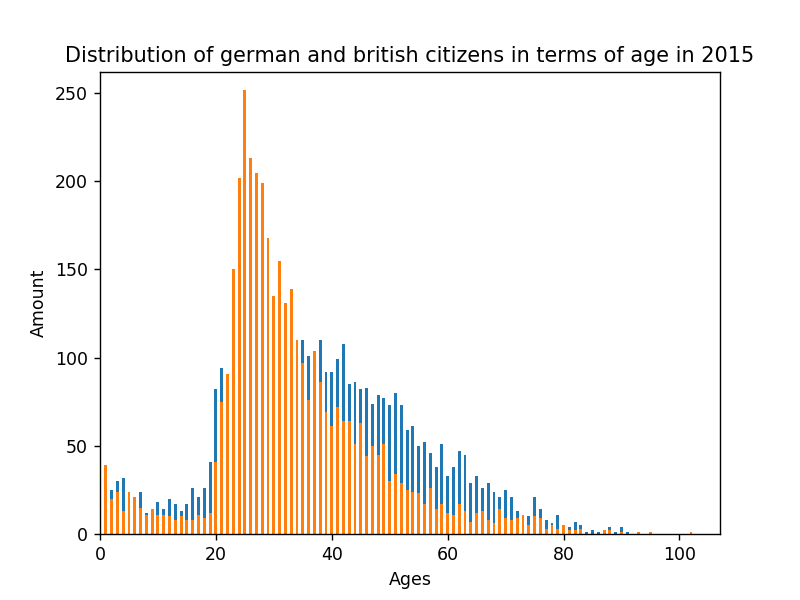

<BarContainer object of 90 artists>

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

g_ages = german_by_age[2015].keys()
germans = german_by_age[2015].values()
b_ages = british_by_age[2015].keys()
brits = british_by_age[2015].values()

plt.figure()

plt.axis([0, max(max(g_ages), max(b_ages)) + 5, 0, max(max(germans), max(brits)) + 10])
plt.title('Distribution of german and british citizens in terms of age in 2015', fontsize=12)
plt.xlabel("Ages", fontsize=10)
plt.ylabel("Amount", fontsize=10)

plt.bar(b_ages, brits, width=0.5, align='center')
plt.bar(g_ages, germans, width=0.5, align='center')
